<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [13]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [14]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [15]:
## Write your code here
# First, check how many missing values are in each critical column:
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())
#Employment: This is a critical feature for analysis. 
#If missing data is small (e.g., <5%), consider dropping those rows. 
#If large, consider imputing or flagging.

#JobSat: Job satisfaction is often subjective; 
#missing data might be common if people skipped it. 
#You can impute with a neutral value or treat missing as a separate category (“No answer”).

#RemoteWork: If missing, see if you can infer from other data (like Employment type), 
#otherwise impute with the mode (most frequent category).

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [16]:
# Impute JobSat missing with 'No answer'
df['JobSat'] = df['JobSat'].fillna('No answer')

# Impute RemoteWork missing with the mode
remote_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remote_mode)
#Check again to confirm no missing values remain in these columns:
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


count    29126.000000
mean         6.935041
std          2.088259
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSatScore, dtype: float64
      ExpRange  JobSatScore
0    0-5 years          7.0
1   5-10 years          7.0
2  10-20 years          7.0
3    >20 years          8.0


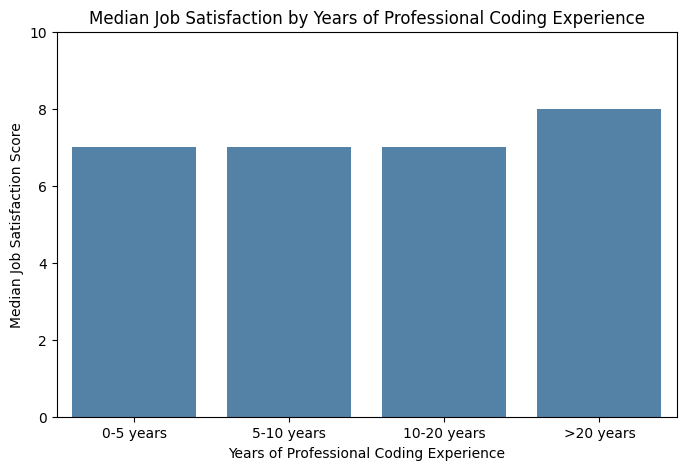

In [24]:
## Write your code here
import numpy as np
df['JobSatScore'] = pd.to_numeric(df['JobSat'], errors='coerce')

print(df['JobSatScore'].describe())

bins = [0, 5, 10, 20, np.inf]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExpRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

df_filtered = df.dropna(subset=['YearsCodePro', 'JobSatScore'])

median_satisfaction = df_filtered.groupby('ExpRange', observed=False)['JobSatScore'].median().reset_index()

print(median_satisfaction)

plt.figure(figsize=(8,5))
sns.barplot(data=median_satisfaction, x='ExpRange', y='JobSatScore', color='steelblue')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.ylim(0, 10)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


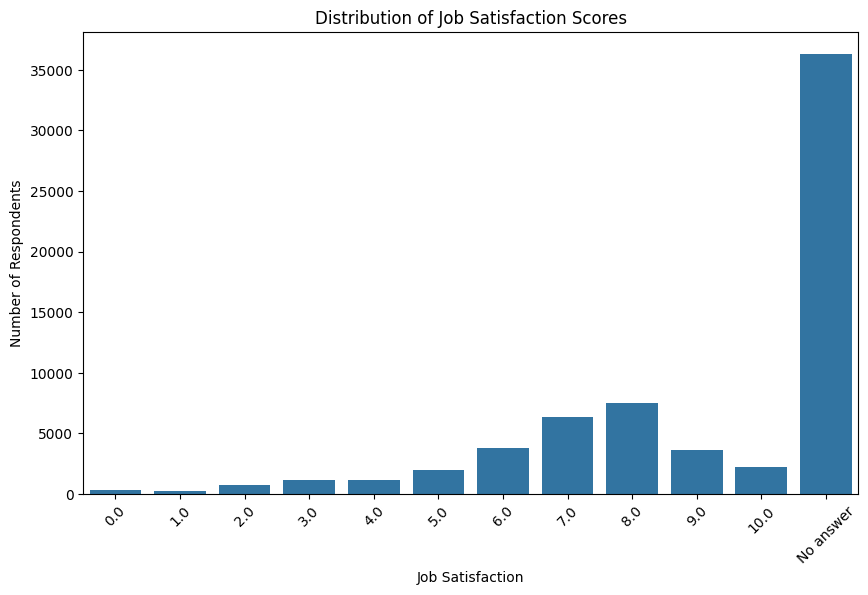

In [25]:
## Write your code here
# Replace 'No answer' with NaN or keep as a separate category if you want to show it
# Here, we keep 'No answer' as is for visualization
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='JobSat', order=sorted(df['JobSat'].unique(), key=lambda x: (x=='No answer', x)))

plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')

plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


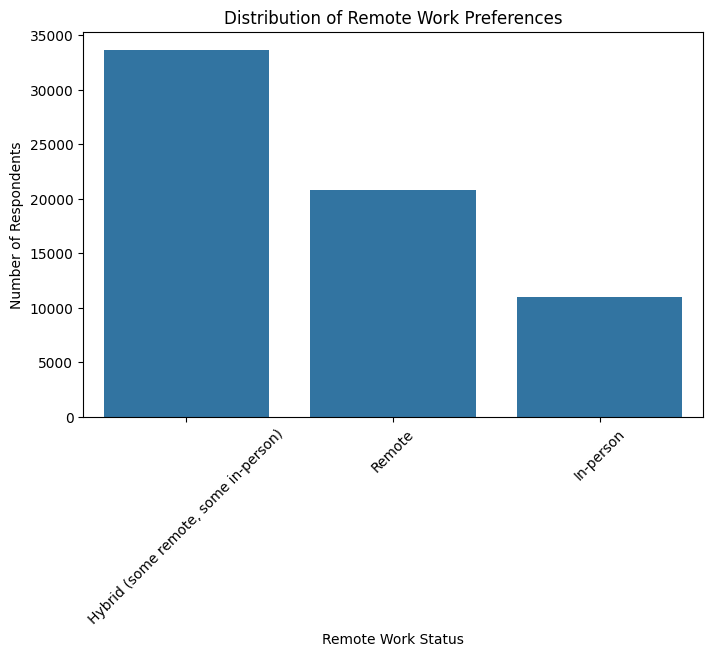

RemoteWork by Employment:
 RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                                   494   
Student, part-time;Employed, part-time               

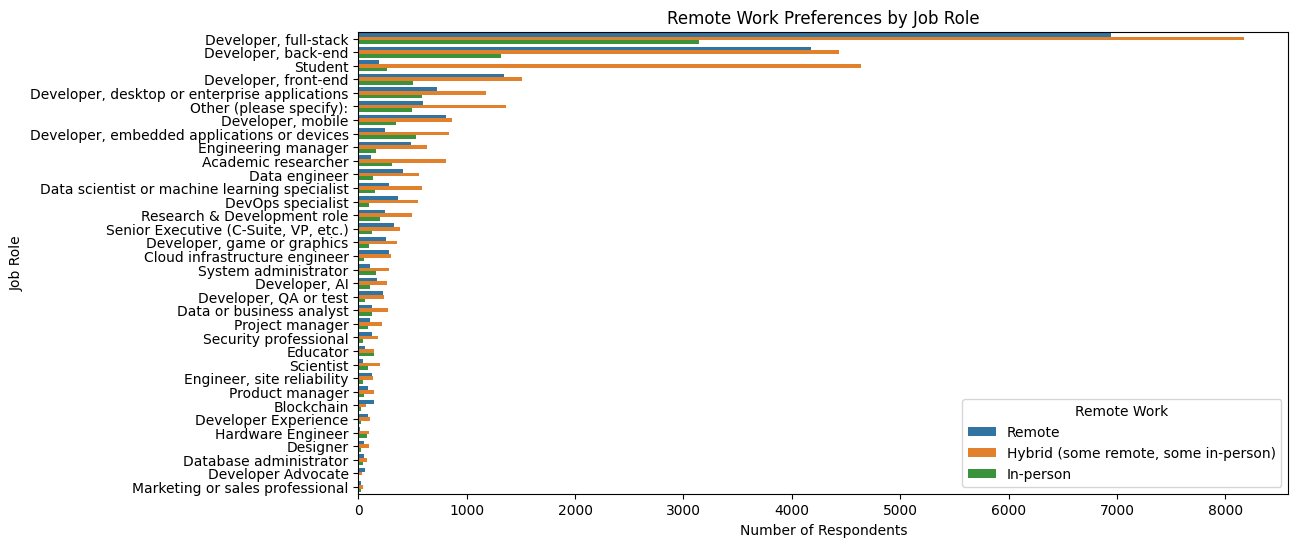

In [26]:
## Write your code here
# 1. Countplot распределения RemoteWork
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

# 2. crosstab Employment
remote_employment_ct = pd.crosstab(df['Employment'], df['RemoteWork'], margins=True)
print("RemoteWork by Employment:\n", remote_employment_ct)

# 3. crosstab RemoteWork by DevType (Job Roles)
if 'DevType' in df.columns:
    remote_jobrole_ct = pd.crosstab(df['DevType'], df['RemoteWork'], margins=True)
    print("\nRemoteWork by Job Role (DevType):\n", remote_jobrole_ct)

    # 4. Countplot RemoteWork by DevType with hue by RemoteWork
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, y='DevType', hue='RemoteWork', order=df['DevType'].value_counts().index)
    plt.title('Remote Work Preferences by Job Role')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Job Role')
    plt.legend(title='Remote Work')
    plt.show()
else:
    print("\nColumn 'DevType' not found in dataframe.")

In [28]:
country_map = {
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Republic of Korea': 'South Korea',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'North Korea': 'North Korea',
    'South Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Iran, Islamic Republic of...': 'Iran',
    'United Republic of Tanzania': 'Tanzania',
    'Syrian Arab Republic': 'Syria',
    'Lao People\'s Democratic Republic': 'Laos',
    'Côte d\'Ivoire': 'Ivory Coast',
    'Congo, Republic of the...': 'Congo',
    'Micronesia, Federated States of...': 'Micronesia',
    'Libyan Arab Jamahiriya': 'Libya',
    'Brunei Darussalam': 'Brunei',
    'Palestine': 'Palestine',
    'Hong Kong (S.A.R.)': 'Hong Kong',
}

edLevel_map = {
    'Primary/elementary school': 'Primary',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional/Doctorate',
    'Something else': 'Other'
}

df['Country'] = df['Country'].replace(country_map)
df['EdLevel'] = df['EdLevel'].replace(edLevel_map)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


   Country            LanguagesList  Count
0  Germany               JavaScript   2732
1  Germany                   Python   2640
2  Germany                 HTML/CSS   2514
3  Germany                      SQL   2297
4  Germany  Bash/Shell (all shells)   1970
5    India               JavaScript   2730
6    India                 HTML/CSS   2322
7    India                   Python   2128
8    India                      SQL   1986
9    India                     Java   1549


/tmp/ipykernel_1179/2415381148.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Count'))


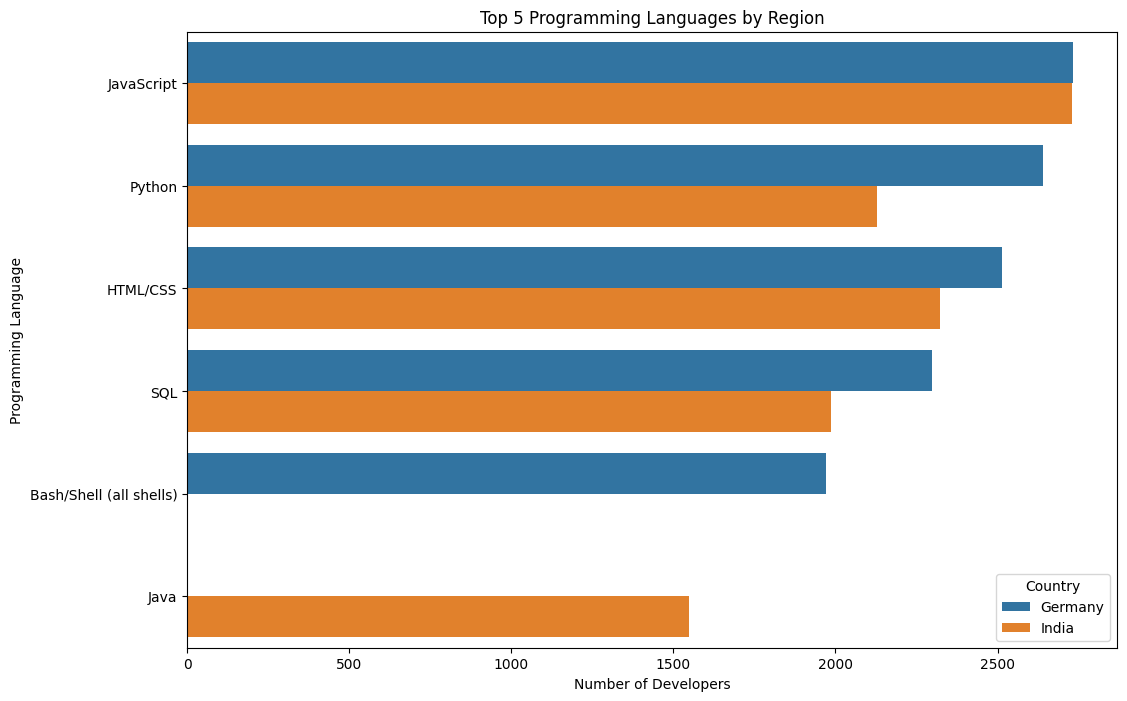

In [29]:
## Write your code here
# Example: Filter by countries (adjust as needed)
regions = ['United States of America', 'India', 'United Kingdom of Great Britain and Northern Ireland', 'Germany']

df_region = df[df['Country'].isin(regions)].copy()

# Split LanguageHaveWorkedWith into lists
df_region['LanguagesList'] = df_region['LanguageHaveWorkedWith'].str.split(';')

# Explode so each language is a separate row
df_exploded = df_region.explode('LanguagesList')

# Count languages by country
lang_counts = df_exploded.groupby(['Country', 'LanguagesList']).size().reset_index(name='Count')

# For each country, get top 5 languages
top_langs = (lang_counts
             .groupby('Country')
             .apply(lambda x: x.nlargest(5, 'Count'))
             .reset_index(drop=True))

print(top_langs)

# Visualization: Bar plot showing top languages by country
plt.figure(figsize=(12,8))
sns.barplot(data=top_langs, x='Count', y='LanguagesList', hue='Country')
plt.title('Top 5 Programming Languages by Region')
plt.xlabel('Number of Developers')
plt.ylabel('Programming Language')
plt.legend(title='Country')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Pearson correlation between YearsCodePro and JobSatPoints_1: -0.033


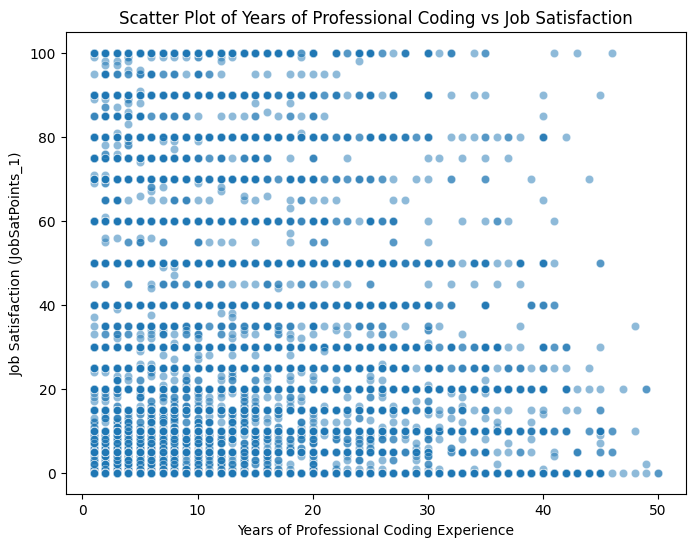

In [30]:
## Write your code here
# Convert columns to numeric, coercing errors
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Filter out rows with missing values in either column
df_filtered = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Calculate correlation
corr = df_filtered['YearsCodePro'].corr(df_filtered['JobSatPoints_1'])
print(f'Pearson correlation between YearsCodePro and JobSatPoints_1: {corr:.3f}')

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_filtered, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Scatter Plot of Years of Professional Coding vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_1179/3908994951.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


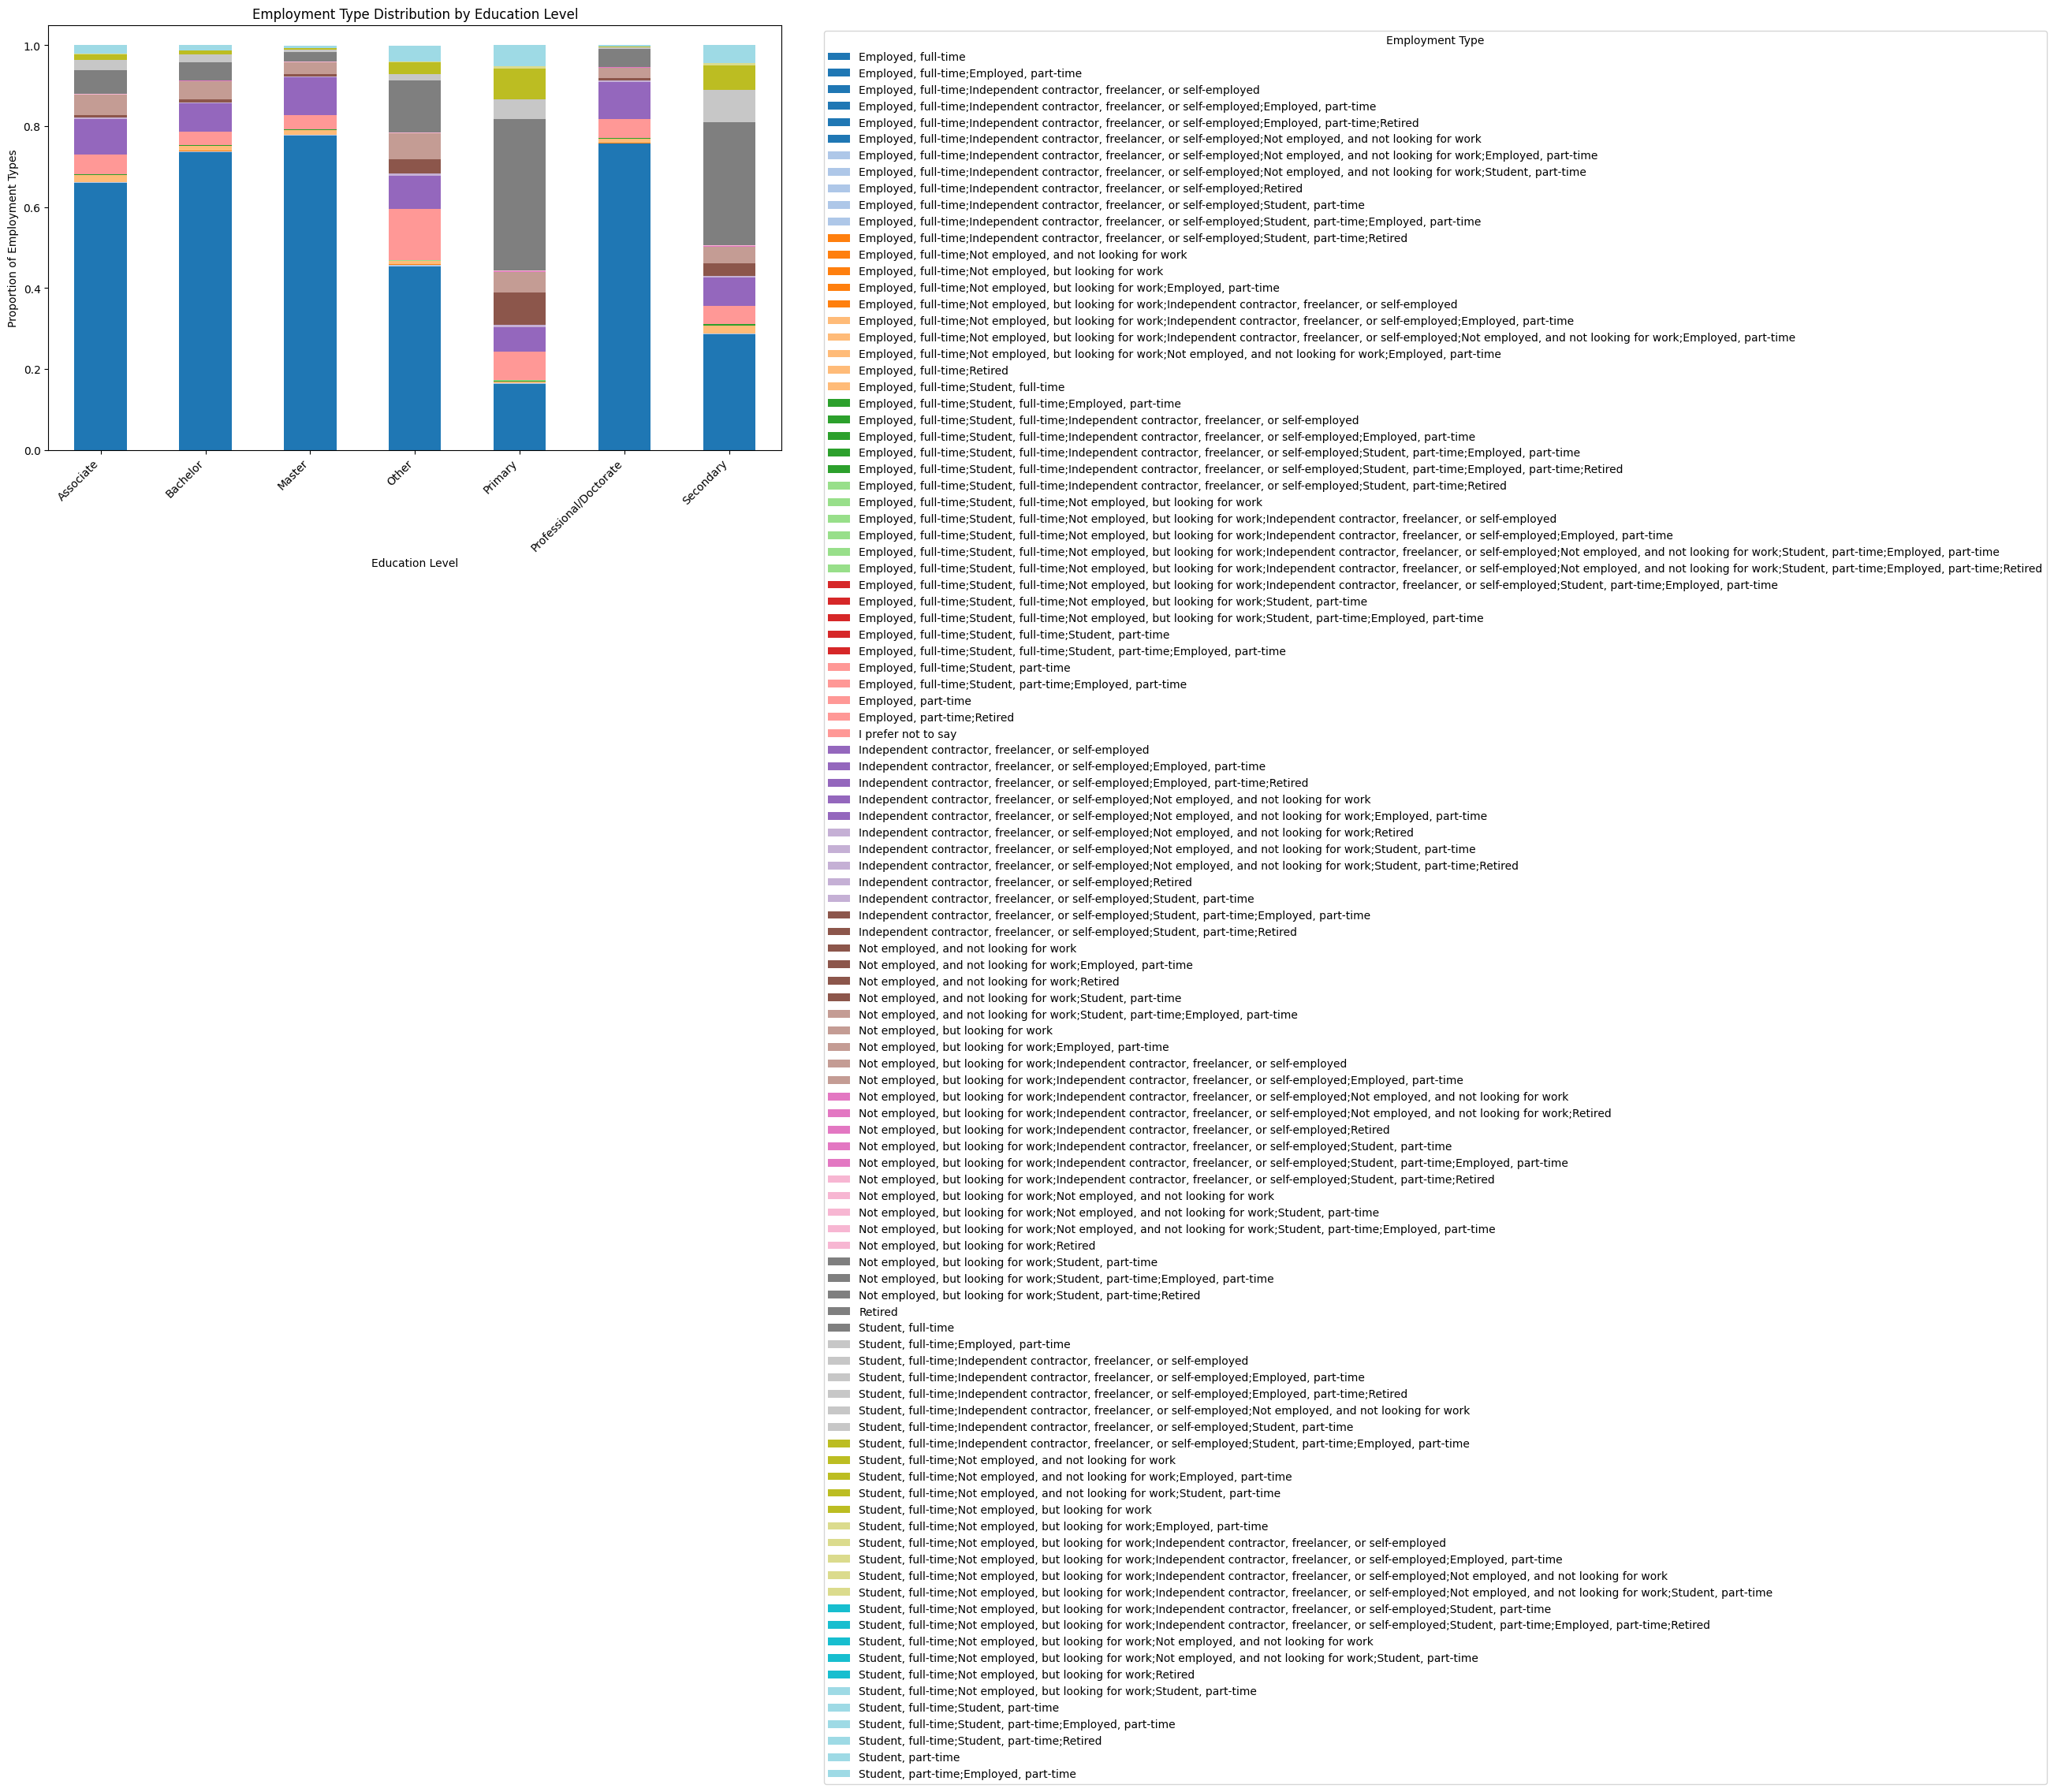

In [32]:
## Write your code here
# Cross-tabulation
edu_emp_ct = pd.crosstab(df['EdLevel'], df['Employment'], margins=True)

edu_emp_prop = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')

edu_emp_prop.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Employment Types')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [33]:
## Write your code here
# Save the DataFrame to CSV (adjust the path/filename as needed)
df.to_csv('modified_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
